<a href="https://colab.research.google.com/github/melkatewabe10/Machine-learning_LST-Estimation-/blob/main/dsr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: **Tewabe** **Melkamu**

Date: 3/13/2025

DSR_Data Collection


In [2]:
import ee
import folium
import matplotlib.pyplot as plt
import geemap
import math
# Authenticate to Earth Engine. This will open a browser window.
ee.Authenticate()

# Initialize the Earth Engine API.
ee.Initialize(project='ee-mftewabe')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data spacification and visualization

In [3]:
# -------------------------------------------------------------------
# 1. Define the study region (Taiwan)
# -------------------------------------------------------------------
gaul = ee.FeatureCollection("FAO/GAUL/2015/level0")
taiwan = gaul.filter(ee.Filter.eq('ADM0_NAME', 'Taiwan'))

# # -------------------------------------------------------------------
# # 2. Load ESA WorldCover and create a mask
# # -------------------------------------------------------------------
# worldcover = ee.ImageCollection("ESA/WorldCover/v200").first().clip(taiwan)
# mask = worldcover.neq(50).And(worldcover.neq(80))  # Remove built-up and water

# -------------------------------------------------------------------
# 3. Define Seasons
# -------------------------------------------------------------------
seasons = {
    "Spring": ('03-01', '05-31'),
    "Summer": ('06-01', '08-31'),
    "Autumn": ('09-01', '11-30'),
    "Winter": ('12-01', '02-28')  # Winter spans two years
}

# -------------------------------------------------------------------
# 4. Loop through each year and export seasonal DSR
# -------------------------------------------------------------------
for year in range(2000, 2025):
    print(f"Processing year: {year}")

    for season, (start, end) in seasons.items():
        print(f"  Processing {season} of {year}")

        if season == "Winter":
            # Winter spans two years
            start_date = ee.Date(f"{year}-12-01")
            end_date = ee.Date(f"{year + 1}-02-28")  # Move to next year
        else:
            start_date = ee.Date(f"{year}-{start}")
            end_date = ee.Date(f"{year}-{end}")

        # Compute seasonal mean DSR
        DSR = (ee.ImageCollection("MODIS/062/MCD18A1")
                .filterDate(start_date, end_date)
                .filterBounds(taiwan)
                .select('GMT_0600_DSR')
                .mean()
                .clip(taiwan))

        # # Convert raw DSR values using the MODIS scale factor (0.0001)
        # DSR_scaled = DSR.multiply(0.0001)

        # # Apply land mask
        # DSR_masked = DSR_scaled.updateMask(mask)

        # Export to Google Drive
        task = ee.batch.Export.image.toDrive(
            image=DSR,
            description=f'DSR_{year}_{season}',
            folder='DSR',  # Update this to your desired Drive folder
            fileNamePrefix=f'DSR_{year}_{season}',
            region=taiwan.geometry().bounds().getInfo()['coordinates'],
            scale=1000,  # MODIS resolution (~1 km)
            crs='EPSG:32651',
            maxPixels=1e13
        )

        task.start()
        print(f"Export task for {year} - {season} started.")


Processing year: 2000
  Processing Spring of 2000
Export task for 2000 - Spring started.
  Processing Summer of 2000
Export task for 2000 - Summer started.
  Processing Autumn of 2000
Export task for 2000 - Autumn started.
  Processing Winter of 2000
Export task for 2000 - Winter started.
Processing year: 2001
  Processing Spring of 2001
Export task for 2001 - Spring started.
  Processing Summer of 2001
Export task for 2001 - Summer started.
  Processing Autumn of 2001
Export task for 2001 - Autumn started.
  Processing Winter of 2001
Export task for 2001 - Winter started.
Processing year: 2002
  Processing Spring of 2002
Export task for 2002 - Spring started.
  Processing Summer of 2002
Export task for 2002 - Summer started.
  Processing Autumn of 2002
Export task for 2002 - Autumn started.
  Processing Winter of 2002
Export task for 2002 - Winter started.
Processing year: 2003
  Processing Spring of 2003
Export task for 2003 - Spring started.
  Processing Summer of 2003
Export task f

In [ ]:
# -------------------------------------------------------------------
# 1. Define the study region (Taiwan)
# -------------------------------------------------------------------
# Using the USDOS/LSIB_SIMPLE/2017 dataset.
# If Taiwan is not available in this dataset, consider an alternative source.
gaul = ee.FeatureCollection("FAO/GAUL/2015/level0")
taiwan = gaul.filter(ee.Filter.eq('ADM0_NAME', 'Taiwan'))

# -------------------------------------------------------------------
# 2. Load ESA WorldCover and create a mask
# -------------------------------------------------------------------
# Load the first image from ESA WorldCover and clip it to Taiwan.
worldcover = ee.ImageCollection("ESA/WorldCover/v200").first().clip(taiwan)
# Class definitions from ESA WorldCover:
# 50 = Built-up, 80 = Permanent water bodies.
# We remove both built-up and permanent water by keeping pixels that are not 50 and not 80.
mask = worldcover.neq(50).And(worldcover.neq(80))

# Create an interactive map (optional).
#Map = geemap.Map(center=[23.5, 121], zoom=7)

# -------------------------------------------------------------------
# 3. Loop through each year from 2004 to 2024 and export the yearly mean LST
# -------------------------------------------------------------------
for year in range(2000, 2025):
    print(f"Processing year: {year}")

    # Define the date range for the year.
    start_date = ee.Date(f'{year}-01-01')
    end_date = ee.Date(f'{year}-12-31')

    # Compute the mean LST image for the year using the MODIS LST (MODIS/061/MOD11A1).
    Evi = (ee.ImageCollection("MODIS/061/MOD13A2")
                .filterDate(start_date, end_date)
                .filterBounds(taiwan)
                .select('EVI')
                .mean()
                .clip(taiwan))

    # Multiply by 0.02 to convert the raw values to Kelvin.
    Evi_s = Evi.multiply(0.0001)

    # Apply the mask.
    Evi_masked = Evi_s.updateMask(mask)

    # Define and start the export task.
    task = ee.batch.Export.image.toDrive(
        image=Evi_masked,
        description=f'EVI_{year}',
        folder='Taiwan_EVI',  # Update this to your desired Drive folder.
        fileNamePrefix=f'EVI_{year}',
        region=taiwan.geometry().bounds().getInfo()['coordinates'],
        scale=1000,  # MODIS resolution is approximately 1 km.
        crs='EPSG:32651',
        maxPixels=1e13
    )
    task.start()
    print(f"Export task for {year} started. Please check your GEE tasks and Google Drive.")

# Optionally, display the interactive map.
#Map

Processing year: 2000
Export task for 2000 started. Please check your GEE tasks and Google Drive.
Processing year: 2001
Export task for 2001 started. Please check your GEE tasks and Google Drive.
Processing year: 2002
Export task for 2002 started. Please check your GEE tasks and Google Drive.
Processing year: 2003
Export task for 2003 started. Please check your GEE tasks and Google Drive.
Processing year: 2004
Export task for 2004 started. Please check your GEE tasks and Google Drive.
Processing year: 2005
Export task for 2005 started. Please check your GEE tasks and Google Drive.
Processing year: 2006
Export task for 2006 started. Please check your GEE tasks and Google Drive.
Processing year: 2007
Export task for 2007 started. Please check your GEE tasks and Google Drive.
Processing year: 2008
Export task for 2008 started. Please check your GEE tasks and Google Drive.
Processing year: 2009
Export task for 2009 started. Please check your GEE tasks and Google Drive.
Processing year: 201

-

-

-

-
**ETHIOPIA_SINGLE**

In [ ]:
# 1. Define Ethiopia's boundary using a FeatureCollection.
gaul = ee.FeatureCollection("FAO/GAUL/2015/level0")
taiwan = gaul.filter(ee.Filter.eq('ADM0_NAME', 'Taiwan'))

# 2. Load the MODIS NDVI dataset, filter by date (January 2018) and by location (Ethiopia).
dataset = ee.ImageCollection('MODIS/061/MOD13A2') \
    .filter(ee.Filter.date('2024-01-01', '2024-12-31')) \
    .filterBounds(taiwan.geometry())

# Select the NDVI band, compute the mean over the time period, and clip to Ethiopia.
ndvi = dataset.select('NDVI').mean().clip(taiwan.geometry())

# Multiply by 0.0001 to convert the raw NDVI values (MODIS NDVI scale factor).
NDVI_1km = ndvi.multiply(0.0001)

# 3. Create a mask to remove water bodies.
# Load ESA WorldCover and clip to Ethiopia.
worldcover = ee.ImageCollection("ESA/WorldCover/v200").first().clip(taiwan)

# In ESA WorldCover, class 80 represents permanent water bodies.
# Create a mask that is True (1) for pixels NOT equal to 80.
mask = worldcover.neq(50).And(worldcover.neq(80))

# Apply the water body mask to the NDVI image.
NDVI_masked = NDVI_1km.updateMask(mask)

# Visualization parameters.
# Since NDVI is now scaled between 0 and 1, we adjust the min and max accordingly.
NDVI_vis = {
    'min': -1,
    'max': 1,
    'palette': ['blue', 'white', 'green']
}

# 4. Create an interactive map centered on Ethiopia.
# Create an interactive map (optional).
Map = geemap.Map(center=[23.5, 121], zoom=7)
Map.addLayer(NDVI_masked, NDVI_vis, 'Masked NDVI')
Map.addLayer(taiwan, {}, 'Taiwan Boundary')
Map.addLayerControl()  # Add layer control to toggle layers

# Display the map (in a Jupyter Notebook, the last statement will display the map)
Map



 **Export**

In [ ]:
# -------------------------------------------------------------------
# 5. Export the masked LST image to Google Drive
# -------------------------------------------------------------------
task = ee.batch.Export.image.toDrive(
    image=NDVI_masked,
    description='NDVI_DEMO',
    folder='Taiwan_NDVI',  # Update this to your desired Drive folder.
    fileNamePrefix='NDVI_DEMO',
    region=taiwan.geometry().bounds().getInfo()['coordinates'],
    scale=1000,  # MODIS resolution is ~1 km.
    crs='EPSG:32651',
    maxPixels=1e13
)
task.start()

print("Export task started. Check your GEE tasks and Google Drive for the exported image.")

Export task started. Check your GEE tasks and Google Drive for the exported image.


**Explor** **in** **Python**

In [4]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 31.3 MB/s eta 0:00:00


Metadata:
driver: GTiff
dtype: float32
nodata: None
width: 282
height: 382
count: 1
crs: EPSG:32651
transform: | 1000.00, 0.00, 118000.00|
| 0.00,-1000.00, 2804000.00|
| 0.00, 0.00, 1.00|


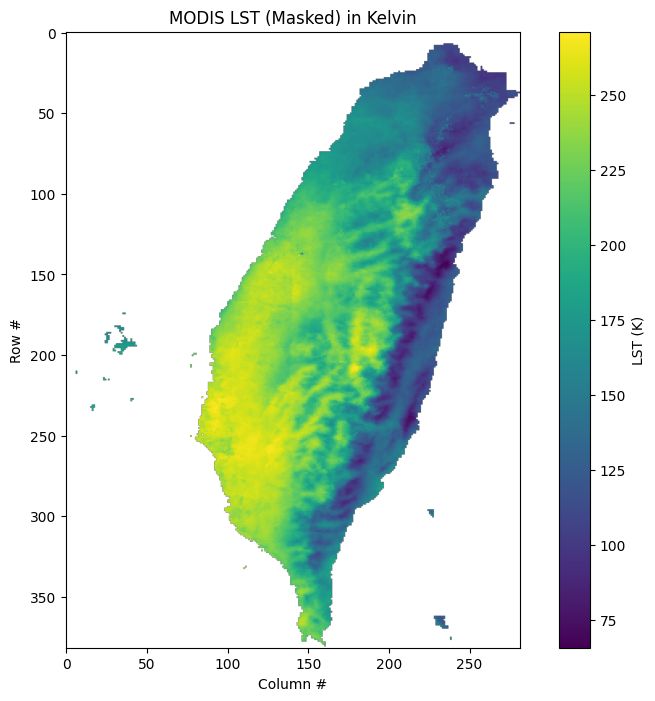

In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path to the downloaded GeoTIFF file.
filename = '/content/drive/MyDrive/DSR/DSR_2010_Winter.tif'

# Open the file with rasterio
with rasterio.open(filename) as src:
    # Read the first band (assuming the LST is stored in a single band)
    lst_data = src.read(1)
    # Get metadata information
    meta = src.meta
    print("Metadata:")
    for key, value in meta.items():
        print(f"{key}: {value}")

# Mask no-data values (if present)
ndvi_masked = np.ma.masked_where(lst_data == src.nodata, lst_data)

# Plot the LST image using matplotlib
plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis  # choose a colormap
img = plt.imshow(ndvi_masked, cmap=cmap)
plt.colorbar(img, label='LST (K)')
plt.title('MODIS LST (Masked) in Kelvin')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()



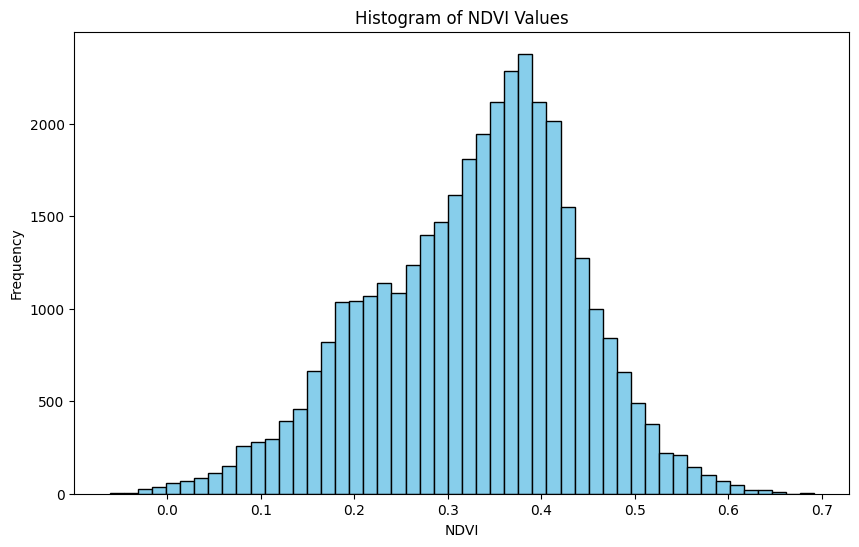

In [ ]:
# prompt: HISTOGRAM

import matplotlib.pyplot as plt
# Plot the histogram of the NDVI data
plt.figure(figsize=(10, 6))
plt.hist(ndvi_masked.compressed(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of NDVI Values')
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.show()
